In [1]:
import warnings

warnings.filterwarnings("ignore")

In [59]:
import requests
from langchain_text_splitters import MarkdownHeaderTextSplitter
from langchain_core.documents import Document
from markdownify import markdownify as md
import re
from markdown import markdown
from bs4 import BeautifulSoup
import re

In [58]:
from typing import *

# ***<span style="color:green">Chunking</span>***

In [115]:
url = "https://nexcel.info/nexcel-career-development-handbook/"
response = requests.get(url)

In [116]:
def convert_html2markdown(html_content: str) -> str:
    markdown_content = md(html_content)
    markdown_content = re.sub("\n\n+", "\n", markdown_content)
    return markdown_content

In [117]:
markdown_content = convert_html2markdown(response.text)

In [118]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
    ("####", "Header 4"),
    ("#####", "Header 5"),
]

In [ ]:
[
    {
        "title": ['ABCXYZ', ...],
        "content": [
            "",
            "",
            "",
            ...
        ],
        "url": "https://"
    },
    ...
]

In [119]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on, 
    strip_headers=True
)

In [120]:
md_header_splits = markdown_splitter.split_text(markdown_content)

In [21]:
chunks = []
for md_header_split in md_header_splits:
    html = markdown(md_header_split.page_content)
    page_content = ''.join(BeautifulSoup(html).findAll(text=True))
    page_content = re.sub(r'\| --- \| --- \| --- \|', '', page_content)
    page_content = re.sub(r'\n+', '\n', page_content).strip()
    chunks.append({
        'url': url,
        'content': page_content
})

In [54]:
md_header_splits[0]

Document(metadata={}, page_content='Nexcel Career Development Handbook – Nexcel Info Site\n[Skip to content](#content)\n[Login](https://nexcel.info/wp-login.php)\n[![Nexcel Info Site](https://nexcel.info/wp-content/uploads/2021/04/Nexcel-1.png)](https://nexcel.info/)  \n* [Bulletin Board](https://nexcel.info/category/bulletin-board/)\n+ [General Announcements & Notices](https://nexcel.info/category/bulletin-board/general-announcements-notices/)\n+ [Health Checkup Announcements](https://nexcel.info/category/bulletin-board/health-checkup-announcements/)\n+ [Holidays Announcements](https://nexcel.info/category/bulletin-board/holidays-announcements/)\n* [HR/Admin/FA](https://nexcel.info/category/hr-admin-fa/)\n+ [Employee Onboarding & Integration](https://nexcel.info/category/hr-admin-fa/recruitment/employee-onboarding-integration/)\n- [Onboarding & Integration Process](https://nexcel.info/category/hr-admin-fa/recruitment/employee-onboarding-integration/onboarding-integration-process/)\n- 

In [79]:
# Title-chunking
# – if the element text length is smaller than 2,048 characters, a merge with the following element is attempted
# – iteratively, element texts are merged following the step above till either the desired length is achieved, without breaking the element
# – if a title element is found, a new chunk is started
# – if a table element is found, a new chunk is started, preserving the entire table

def title_chunking(markdown_split: List[Document]) -> List[Dict[str, Any]]: 

    list_info = []
    for markdown_text in markdown_split:

        headers = []
        # Split different types of headers
        info = markdown_text.page_content.split('\n')
        contents = info
        if info[0].split(' ')[0] == "###":
            header1 = info[0]
            headers = [info[0]]
            contents = info[1:]
        elif info[0].split(' ')[0] == "####":
            info.insert(0, header1)
            header2 = info[0]
            headers = info[:2]
            contents = info[2:]
        elif info[0].split(' ')[0] == "#####":
            info.insert(0, header1)
            info.insert(1, header2)
            headers = info[:3]
            contents = info[3:]
        dict_info = {
            'headers': headers,
            'contents': contents,
            'url': url
        }
        
        list_info.append(dict_info)
    
    return list_info
        # If that paragraph is image, send to LVM (Large Vision Model) to gain main bullet points
        
        # Otherwise, split by the point
        
        # Concatenate the different headers into each bullets points

In [80]:
t = title_chunking(md_header_splits)

In [132]:
def pretty_json(texts: List[Dict[str, Any]]) -> None:
    
    for text in texts:
        
        print('URL: ', text['url'])
        print('HEADERS: ', text['headers'])
        print('\n')
        print('CONTENTS: ')
        # print(' '.join(text['contents']))
        for i, content in enumerate(text['contents']):
            # print(content + '\n')
            
            html = markdown(content)
            page_content = ''.join(BeautifulSoup(html).findAll(text=True))
            page_content = re.sub(r'\| --- \| --- \| --- \|', '', page_content)
            page_content = re.sub(r'\n+', '\n', page_content).strip()
            print(page_content + '\n')
            if i != len(text['contents']) - 1:
                print("====" * 30)
        print("############" * 10 + '\n')

In [133]:
pretty_json(t[1: 4])

URL:  https://nexcel.info/nexcel-career-development-handbook/
HEADERS:  ['### 1.1. Purpose']


CONTENTS: 
Nexcel Career Development Handbook is the document that presents the guidelines, regulations, and procedures for advancing and promoting Nexcel employee’s career paths. The overall purpose of the career advancement/promotion process is to reward and invest in well-performed employees, and motivate them to improve their performance.

########################################################################################################################

URL:  https://nexcel.info/nexcel-career-development-handbook/
HEADERS:  ['### 1.2. Nexcel Career Paths']


CONTENTS: 
Nexcel Career Paths encompass various progressions of all Nexcel’s occupations, ranked in a progressive order based on the level of qualifications, skills, and contributions, with two different classifications including Professional and Management Branches.

Our career paths aim to assist employees in identifying thei

In [ ]:
{
    "scores": [
        0.48051196336746216,
        0.41029220819473267,
        0.39632341265678406,
        0.37228578329086304,
        0.3333017826080322,
        0.2796628475189209
    ],
    "urls": [
        "https://nexcel.info/nexcel-career-development-handbook/",
        "https://nexcel.info/nexcel-career-development-handbook/",
        "https://nexcel.info/nexcel-career-development-handbook/",
        "https://nexcel.info/nexcel-career-development-handbook/",
        "https://nexcel.info/employee-handbook-2/",
        "https://nexcel.info/nexcel-career-development-handbook/"
    ],
    "contexts": [
        "1.6. Individual/Committee Responsibilities \
        1.6.1. Supervisor’s Responsibilities\
        Prepare a list of potential candidates for promotion, and send it to Director/Unit Head no later than December 1st of the year when the promotion takes place.\
        Meet with the candidates to inform them about the promotion opportunities and discuss their future career goals/aspirations.\
        Ask the candidates to collect evidentiary materials and to use said materials to prepare for the Promotion Document.\
        Set a mutually agreeable schedule for completing the Promotion Document.\
        Verify and ensure the validity of the evidentiary materials provided by the candidates.\
        Inform the candidates of the final evaluation/approval results.",
        "1.6.3. Promotion Committee’s Responsibilities\
        The Promotion Committee will assess if the candidate recommended for promotion is qualified and ready to take on the responsibilities \
        of the higher position and will advise the Director/Unit Head accordingly.\
        Members shall observe and validate the abilities and capabilities \
        of the potential candidate based on the evidentiary materials provided and the criteria/attributes listed in Evaluation Criteria, and finalize \
        the evaluation result by filling and completing the Promotion Assessment Form.\
        Members are responsible for ensuring that all decisions are taken in the best interests of the organization and that their role is carried out effectively.\
        Recommend advancement/promotion, or prepare notes/emails detailing reasons for denial and advising ways of improvement should a rejection decision be rendered.\
        Inform the Human Resource Department of the evaluation results.",
        "1.6.2. Candidate’s Responsibilities\
        Collect evidentiary materials demonstrating he/she has the adequate level of seniority, qualifications, skills, impact, \
        and performance to take on the added responsibilities, and use said materials to prepare for the Promotion Document.\
        Submit the Promotion Document on the mutually agreeable schedule.",
        "1.6.4. Human Resource Department’s Responsibilities\
        Human Resource Department shall recommend the Promotion Committee to Top Management for approval.\
        Inform the evaluation/approval results to Director/Unit Head or Supervisors.\
        Prepare the new contract appendices and inform the newly promoted employees about the changes in salary and benefits (if any).",
        "2.8.3. Procedure\nThe employee has to submit a written letter of resignation to the General Director, the HR-Admin Manager, and the direct leader and supervisor.\
        If the employee fails to give the required notice, the Company at its discretion has the right to withhold or deduct the employee’s salary in lieu of notice.\
        3. COMPENSATION AND BENEFITS\
        ============================\
        3.1. Compensation",
        "'1.6.5. Director/Unit Head’s Responsibilities\
        Evaluate and approve of the candidates list provided by Supervisors.\
        Select candidates for Management Branch promotion.\
        Send candidates list and promotion request to Promotion Committee or Top Management.\
        Assess the listed candidates (at Assistant Engineer and Engineer levels) and make the final approval decision.\
        Evaluation Criteria"
    ],
    "indices": [
        40,
        42,
        41,
        43,
        3,
        44
    ]
}


In [ ]:
index = [10, 11]

for i in index:
    print("URL: ", chunks[i]['url'])
    print("CHUNK: ", chunks[i]['content'])
    print("=====================================================")
    print("\n")

In [ ]:
# Late-chunking
def late_chunking(text: str) -> str: 
    pass

In [28]:
sumerize_text = "Here are the main bullet points summarizing the content:\n\n* The Management Branch refers to managerial positions that oversee and manage groups or projects.\n* Managerial positions are classified into two groups:\n + Team Management: Supervisors/Managers who oversee daily activities of a group/team\n + Project Management: Project Managers responsible for leading projects from initiation to completion\n* There are 4 job titles (from Supervisor/Project Manager to Director/Program Director) for each group.\n* The job grades at the Management Branch are as follows:\n + Team Management:\n - Level 1: Director, Program Director (no grade listed)\n - Level 2: Manager, Program Manager (no grade listed)\n - Level 3: Assistant Manager, Senior Project Manager (grade A)\n + Project Management:\n - Level 1: Project Manager/Assistant Project Manager\n    * Grade A: 5+ years of experience as a Project Manager\n    * Grades B and C not specified\n - Level 2: Program Manager\n    * Grade A listed for Assistant Project Managers (<3 years)"

In [ ]:
# titles.json
[
    {
        "title": "",
        "path": "vectordb_1.bin"
    },
    ...
]

# headers.json
[
    {
        "header": "",
        "path": "vectordb_1.bin"
    },
    ...
]

# documents.json
[
    "lmao",
    "mvbj",
    ...
]

In [ ]:
from sentence_transformers import SentenceTransformer
import torch

# Download from the 🤗 Hub
model = SentenceTransformer("hiieu/halong_embedding")

# Define query and documents
query = sumerize_text
docs = [
    chunks[1]['content'],
    chunks[2]['content'],
    chunks[3]['content'],
    chunks[4]['content'],
    chunks[5]['content']
]

# Encode query and documents
query_embedding = model.encode([query])
doc_embeddings = model.encode(docs)
similarities = model.similarity(query_embedding, doc_embeddings).flatten()

# Sort documents by cosine similarity
sorted_indices = torch.argsort(similarities, descending=True)
sorted_docs = [docs[idx] for idx in sorted_indices]
sorted_scores = [similarities[idx].item() for idx in sorted_indices]

# Print sorted documents with their cosine scores
for doc, score in zip(sorted_docs, sorted_scores):
    print(f"Document: {doc} - Cosine Similarity: {score:.4f}")

# ***<span style="color:green">Web Crawler</span>***

In [ ]:
from googlesearch import search
import requests
from bs4 import BeautifulSoup
from markdownify import markdownify as md

# Tìm kiếm URL
# query = "Công ty Nexcel Solutions thành lập vào năm nào"
# search_results = list(search(query, num_results=6, advanced=True))
# if search_results:
#     url = search_results[0].url
#     print(f"Found URL: {url}")
# else:
#     print("No URL found.")
#     exit()
url = "https://nexcel.info/nexcel-career-development-handbook/"
# Lấy nội dung từ URL
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    
    # Lấy nội dung chính (giả sử trong thẻ <body>)
    content = soup.get_text(separator="\n")
    
    # Lưu vào file .txt
    with open("./employee_handbook.txt", "w", encoding="utf-8") as txt_file:
        txt_file.write(content)
    
    # Chuyển đổi sang Markdown
    markdown_content = md(html_content)
    with open("./employee_handbook.md", "w", encoding="utf-8") as md_file:
        md_file.write(markdown_content)
    
    print("Content saved to 'employee_handbook.txt' and 'employee_handbook.md'")
else:
    print(f"Failed to fetch the URL: {response.status_code}")


Content saved to 'employee_handbook.txt' and 'employee_handbook.md'


In [12]:
print(search_results)

[SearchResult(url=https://www.itjobs.com.vn/vi/employer/profile/nexcel-solutions-246, title=Nexcel Solutions - ITJobs.com.vn, description=Công TY TNHH Một Thành Viên Giải Pháp NEXCEL - Nexcel Solutions, một nhà ... ITJobs được thành lập vào năm 2014 tại Việt Nam và mục tiệu chính là trở ...), SearchResult(url=https://vn.linkedin.com/company/nexcel-solutions, title=Nexcel Solutions, description=Quy mô công ty: 201-500 nhân viên. Trụ sở: Ho Chi Minh, Ho Chi Minh. Loại hình: Privately Held. Thành lập: 2011. Vị trí. Chính. SMS Tower, Quang Trung Software ...), SearchResult(url=https://hosocongty.vn/cong-ty-tnhh-mot-thanh-vien-giai-phap-nexcel-com-83090.htm, title=công ty tnhh một thành viên giải pháp nexcel, description=Jan 31, 2023 — CÔNG TY TNHH MỘT THÀNH VIÊN GIẢI PHÁP NEXCEL · Đại diện pháp luật: AKAPAT RUKSAPHUN · Điện thoại: · Ngày cấp: 21/01/2010 · Ngành nghề chính: Tư vấn ...), SearchResult(url=https://www.topcv.vn/cong-ty/nexcel-solutions/116877.html, title=Nexcel Solutions, descr

In [77]:
import re

markdown_content = re.sub("\n\n+", "\n", markdown_content)

In [85]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
    ("####", "Header 4"),
    ("#####", "Header 5"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on, strip_headers=False)
md_header_splits = markdown_splitter.split_text(markdown_content)

In [ ]:
print(md_header_splits[4].page_content)

In [ ]:
from bs4 import BeautifulSoup
from markdown import markdown

html = markdown(md_header_splits[4].page_content)
text = ''.join(BeautifulSoup(html).findAll(text=True))

In [ ]:
print(text)

In [97]:
response = requests.get('http://nexcel.info/wp-content/uploads/2021/05/promotion-committee-assessment-form.jpg')

In [98]:
response

<Response [200]>

In [89]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size = 250
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(md_header_splits)

In [96]:
print(splits[100].page_content)

| 3 | A | Assistant Manager | Senior Project Manager | 5+ years |
|  | B |  |  |  |
|  | C |  |  |  |
| 4 | A | Supervisor/Tech Supervisor | Project Manager/Assistant Project Manager | Project Manager: 3+ years Assistant Project Manager: <3 years |


In [68]:
from duckduckgo_search import DDGS
import re
from langchain_community.document_loaders import AsyncChromiumLoader
from langchain_community.document_transformers import BeautifulSoupTransformer

def gg_search(query):
    # results = DDGS().text(query, max_results=5)
    # print(results)
    # urls = []
    # for result in results:
    #     url = result['href']
    #     urls.append(url)
    search_results = list(search(query, num_results=6, advanced=True))
    contents = []
    for result in search_results:
        response = requests.get(result.url)
        html_content = response.text
        soup = BeautifulSoup(html_content, "html.parser")
        content = soup.get_text(separator="\n")
        page_text = re.sub("\n\n+", "\n", content)
        # text = truncate(page_text)
        contents.append(page_text)

    return contents

def ddg_search(query):
    results = DDGS().text(query, max_results=5)
    print(results)
    urls = []
    for result in results:
        url = result['href']
        urls.append(url)

    docs = get_page(urls)

    content = []
    for doc in docs:
        page_text = re.sub("\n\n+", "\n", doc.page_content)
        # text = truncate(page_text)
        content.append(page_text)

    return content

def get_page(urls):
    loader = AsyncChromiumLoader(urls)
    html = loader.load()

    bs_transformer = BeautifulSoupTransformer()
    docs_transformed = bs_transformer.transform_documents(html, tags_to_extract=["p"], remove_unwanted_tags=["a"])

    return docs_transformed

def truncate(text):
    words = text.split()
    truncated = " ".join(words[:400])

    return truncated 

In [69]:
content = gg_search("Công ty Nexcel Solutions thành lập vào năm nào ?")

In [43]:
path = 'https://nexcel.info/employee-handbook-2/'
response = requests.get(path)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')
all_text = soup.get_text(separator="\n")


In [46]:
page_text = re.sub("\n\n+", "\n", all_text)

In [ ]:
t = re.sub("\n\n+", "\n", markdown)
print(t)

In [50]:
markdown = md(html_content)

c:\Users\leon.pham\AppData\Local\anaconda3\envs\langchain\Lib\site-packages\bs4\element.py:955: RuntimeWarning: coroutine 'AsyncChromiumLoader.ascrape_playwright' was never awaited
  u.setup()


In [53]:
print(type(markdown))

<class 'str'>


In [ ]:
print(page_text)

In [ ]:
print(content[0])

In [73]:
links = [a['href'] for a in soup.find_all('a', href=True)]

# ***<span style="color:green">Sentence Similarity</span>***

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer("nomic-ai/modernbert-embed-base")

# Define query embeddings
query_embeddings = model.encode([
    "search_query: Show me some Idividual Responsibilities",
    "search_query: Who is Laurens van der Maaten?",
])

# Define document embeddings
doc_embeddings = model.encode([
    """1.6. Individual/Committee Responsibilities
    1.6.1. Supervisor’s Responsibilities
    - Prepare a list of potential candidates for promotion and send it to Director/Unit Head no later than December 1st of the year when the promotion takes place.
    - Meet with the candidates to inform them about the promotion opportunities and discuss their future career goals/aspirations.
    - Ask the candidates to collect evidentiary materials and to use said materials to prepare for the Promotion Document.
    - Set a mutually agreeable schedule for completing the Promotion Document.
    - Verify and ensure the validity of the evidentiary materials provided by the candidates.
    - Inform the candidates of the final evaluation/approval results.

    1.6.3. Promotion Committee’s Responsibilities
    - The Promotion Committee will assess if the candidate recommended for promotion is qualified and ready to take on the responsibilities of the higher position and will advise the Director/Unit Head accordingly.
    - Members shall observe and validate the abilities and capabilities of the potential candidate based on the evidentiary materials provided and the criteria/attributes listed in Evaluation Criteria, and finalize the evaluation result by filling and completing the Promotion Assessment Form.
    - Members are responsible for ensuring that all decisions are taken in the best interests of the organization and that their role is carried out effectively.
    - Recommend advancement/promotion or prepare notes/emails detailing reasons for denial and advising ways of improvement should a rejection decision be rendered.
    - Inform the Human Resource Department of the evaluation results.
    """
])

# Print the shapes of the embeddings
print(query_embeddings.shape, doc_embeddings.shape)
# Output: (2, 768) (1, 768)

# Calculate similarities between queries and the document
similarities = model.similarity(query_embeddings, doc_embeddings)

# Print the similarity scores
print(similarities)
# Example Output:
# tensor([[0.7214],
#         [0.3260]])


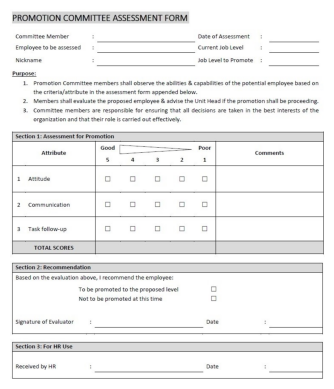

In [16]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# URL of the image
image_url = "https://nexcel.info/wp-content/uploads/2021/05/promotion-committee-assessment-form.jpg"

# Fetch the image using requests
response = requests.get(image_url)
if response.status_code == 200:
    # Convert the content to a NumPy array and decode it into an image
    image_data = np.frombuffer(response.content, np.uint8)
    image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

    # Convert the image to RGB (from BGR) for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes for better display
    plt.show()
else:
    print(f"Failed to fetch the image. Status code: {response.status_code}")


# ***<span style="color:green">RAG</span>***

In [ ]:
# To install all available features
!pip3 install "crawl4ai[all]"

# After installation, download the necessary models for better performance:
!crawl4ai-download-models

# Lastly, install Playwright dependencies
!playwright install 

In [2]:
with open('D:\Desktop\chatbot4group\data\Employee Handbook – Nexcel Info Site.html', 'r') as file:
    html_as_string = file.read()

In [ ]:
print(html_as_string)

In [1]:
import requests

url = 'https://nexcel.info/employee-handbook-2/'  # Replace with your desired URL
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
else:
    print('Failed to retrieve the document')

In [ ]:
from bs4 import BeautifulSoup

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Pretty-printing the parsed HTML
print(soup.prettify())

In [4]:
title = soup.title.string
print(f'Page Title: {title}')

Page Title: Employee Handbook – Nexcel Info Site


In [ ]:
all_text = soup.get_text()
print(all_text)

In [ ]:
links = [a['href'] for a in soup.find_all('a', href=True)]
print('Links Found:', links)

In [ ]:
data = {
    'title': title,
    'text': all_text,
    'links': links
}

print('Structured Data:', data)

In [ ]:
from langchain.schema import Document

document = Document(
    page_content=data['text'],
    metadata={
        'title': data['title'],
        'links': data['links'],
    }
)

print('LangChain Document Created:', document)

In [31]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Splitting the document into manageable chunks
text_splitter = RecursiveCharacterTextSplitter()
text_splitter._chunk_size = 500
text_splitter._chunk_overlap = 20
documents = text_splitter.split_documents([document])

print(f'Number of Chunks Created: {len(documents)}')

Number of Chunks Created: 164


In [26]:
import re


def format_text(text):
    # Step 1: Remove excess whitespace and ensure consistent formatting
    text = re.sub(r'\n+', '\n', text.strip())
    
    # Step 2: Break the text into major sections based on patterns like '------'
    sections = re.split(r'\n[-=]+\n', text)
    
    formatted_text = ''
    
    for section in sections:
        # Step 3: For each section, process the title and content
        lines = section.strip().split('\n')
        title = lines[0]
        content = '\n'.join(lines[1:])
        
        # Step 4: Add title to formatted text
        formatted_text += title + '\n' + '-' * len(title) + '\n'
        
        # Step 5: Handle indentation for nested bullet points
        formatted_text += format_content(content) + '\n\n'
    
    return formatted_text.strip()



def format_content(content):
    lines = content.split('\n')
    formatted_lines = []
    indent_level = 0

    for line in lines:
        if line.startswith('-'):
            # Bullet points, so we add indentation
            formatted_lines.append('  ' * indent_level + line)
        else:
            # Non-bullet point, reset indentation
            if line.strip() == '':
                formatted_lines.append('')
            else:
                formatted_lines.append('  ' * indent_level + line)
        
        # Increase indent if the line is a section heading
        if re.search(r'[A-Za-z\s]+$', line):
            indent_level += 1
    
    return '\n'.join(formatted_lines)



def format_content_for_markdown(content):
    lines = content.split('\n')
    formatted_lines = []
    indent_level = 0

    for line in lines:
        if line.startswith('-'):
            # Bullet points, add indentation
            formatted_lines.append('  ' * indent_level + line)
        else:
            # Non-bullet point, reset indentation
            if line.strip() == '':
                formatted_lines.append('')
            else:
                formatted_lines.append('  ' * indent_level + line)
        
        # Increase indent if the line is a sub-section heading
        if re.search(r'[A-Za-z\s]+$', line):
            indent_level += 1
    
    return '\n'.join(formatted_lines)



def format_to_markdown(text):
    # Step 1: Remove excess whitespace and ensure consistent formatting
    text = re.sub(r'\n+', '\n', text.strip())
    
    # Step 2: Break the text into major sections based on patterns like '------'
    sections = re.split(r'\n[-=]+\n', text)
    
    markdown_text = ''
    
    for section in sections:
        # Step 3: For each section, process the title and content
        lines = section.strip().split('\n')
        title = lines[0]
        content = '\n'.join(lines[1:])
        
        # Step 4: Add title to markdown text as H1
        markdown_text += f'# {title}\n\n'
        
        # Step 5: Handle indentation for nested bullet points
        markdown_text += format_content_for_markdown(content) + '\n\n'
    
    return markdown_text.strip()

In [27]:
t = format_content(documents[0].page_content)

In [1]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
  "Write a delicious recipe for {dish} with a {flavor} twist."
)

# Formatting the prompt with new content
formatted_prompt = prompt_template.format(dish="pasta", flavor="spicy")

print(formatted_prompt)

Write a delicious recipe for pasta with a spicy twist.


In [ ]:
import time

def nextSquare():
    i = 1
 
    # An Infinite loop to generate squares
    while True:
        yield i*i
        i += 1  # Next execution resumes
        time.sleep(4)
        # from this point
 
 
# Driver code to test above generator
# function
for num in nextSquare():
    if num > 100:
        break
    print(num)

In [2]:
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate

examples = [
    {
        "question": "What is the tallest mountain in the world?",
        "answer": "Mount Everest",
    },
    {"question": "What is the largest ocean on Earth?", "answer": "Pacific Ocean"},
    {"question": "In which year did the first airplane fly?", "answer": "1903"},
]

example_prompt = PromptTemplate(
    input_variables=["question", "answer"],
    template="Question: {question}\n{answer}",
)
prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question: {input}",
    input_variables=["input"],
)

print(
    prompt_template.format(
        input="What is the name of the famous clock tower in London?"
    )
)

Question: What is the tallest mountain in the world?
Mount Everest

Question: What is the largest ocean on Earth?
Pacific Ocean

Question: In which year did the first airplane fly?
1903

Question: What is the name of the famous clock tower in London?
